In [1]:
import datetime
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
import networkx as nx
import scipy.sparse as sp
from math import log
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

In [2]:
posts = pd.read_csv("core_message_posts.csv") 
posts.head()

,msg_id,msg_topic_id,msg_date,msg_post,msg_post_key,msg_author_id,msg_ip_address,msg_is_first_post
0,1,1,1316144998,<p>The best first post to make on our forums i...,3320f7f06c422ef0fb77342724b4fd24,1,178.140.119.217,1
1,2,2,1316174048,\n<p>Who are we hosting this forum from?</p>\n...,9204e4883321af2275a37138d054a3f1,11,109.78.212.13,1
2,3,2,1316183999,<p>Crisis Host - they basically provide hostin...,12fd0309239711d02b39127de3502c51,1,178.140.119.217,0
3,4,2,1316186941,"<p>Thank you, I'll make a note of it, I am ver...",0658c6f99ac18d90609ea074ae5eefe6,11,109.78.212.13,0
4,5,2,1316187178,<p>If you mean the dark+orange skin then that'...,570257864e3cb812eebc2de5e5919080,1,178.140.119.217,0


In [3]:
topics = pd.read_csv("core_message_topics.csv") 
topics.head()

,mt_id,mt_date,mt_title,mt_hasattach,mt_starter_id,mt_start_time,mt_last_post_time,mt_to_count,mt_to_member_id,mt_replies,mt_first_msg_id,mt_is_draft,mt_is_deleted,mt_is_system
0,1,1316144998,Introductions are important,0,1,1316144998,1316144998,1,23,0,1,0,1,0
1,2,1316174048,Our hosts,0,11,1316174047,1316187891,1,1,4,2,0,0,0
2,3,1316223829,Re: Nova Roma,0,16,1316223829,1316224790,1,14,1,7,0,1,0
3,5,1316528414,Introductions are important,0,1,1316528414,1316529737,1,20,1,12,0,1,0
4,6,1316700737,msn,0,1,1316700737,1316701077,1,11,1,14,0,1,0


In [4]:
for i,post in posts.iterrows():
    value=datetime.datetime.fromtimestamp(post["msg_date"])
    posts.loc[i, "msg_date"] = f"{value:%Y-%m-%d %H:%M:%S}"
posts.head()

,msg_id,msg_topic_id,msg_date,msg_post,msg_post_key,msg_author_id,msg_ip_address,msg_is_first_post
0,1,1,2011-09-16 09:19:58,<p>The best first post to make on our forums i...,3320f7f06c422ef0fb77342724b4fd24,1,178.140.119.217,1
1,2,2,2011-09-16 17:24:08,\n<p>Who are we hosting this forum from?</p>\n...,9204e4883321af2275a37138d054a3f1,11,109.78.212.13,1
2,3,2,2011-09-16 20:09:59,<p>Crisis Host - they basically provide hostin...,12fd0309239711d02b39127de3502c51,1,178.140.119.217,0
3,4,2,2011-09-16 20:59:01,"<p>Thank you, I'll make a note of it, I am ver...",0658c6f99ac18d90609ea074ae5eefe6,11,109.78.212.13,0
4,5,2,2011-09-16 21:02:58,<p>If you mean the dark+orange skin then that'...,570257864e3cb812eebc2de5e5919080,1,178.140.119.217,0


In [5]:
for i,topic in topics.iterrows():
    value = datetime.datetime.fromtimestamp(topic["mt_date"])
    topics.loc[i, "mt_date"] = f"{value:%Y-%m-%d %H:%M:%S}"
    value = datetime.datetime.fromtimestamp(topic["mt_start_time"])
    topics.loc[i, "mt_start_time"] = f"{value:%Y-%m-%d %H:%M:%S}"
    value = datetime.datetime.fromtimestamp(topic["mt_last_post_time"])
    topics.loc[i, "mt_last_post_time"] = f"{value:%Y-%m-%d %H:%M:%S}"
topics.head()

,mt_id,mt_date,mt_title,mt_hasattach,mt_starter_id,mt_start_time,mt_last_post_time,mt_to_count,mt_to_member_id,mt_replies,mt_first_msg_id,mt_is_draft,mt_is_deleted,mt_is_system
0,1,2011-09-16 09:19:58,Introductions are important,0,1,2011-09-16 09:19:58,2011-09-16 09:19:58,1,23,0,1,0,1,0
1,2,2011-09-16 17:24:08,Our hosts,0,11,2011-09-16 17:24:07,2011-09-16 21:14:51,1,1,4,2,0,0,0
2,3,2011-09-17 07:13:49,Re: Nova Roma,0,16,2011-09-17 07:13:49,2011-09-17 07:29:50,1,14,1,7,0,1,0
3,5,2011-09-20 19:50:14,Introductions are important,0,1,2011-09-20 19:50:14,2011-09-20 20:12:17,1,20,1,12,0,1,0
4,6,2011-09-22 19:42:17,msn,0,1,2011-09-22 19:42:17,2011-09-22 19:47:57,1,11,1,14,0,1,0


In [6]:
start_date = '2011-01-01'
end_date = '2011-12-31'
posts_2011 = posts[(posts['msg_date']>= start_date) & (posts['msg_date']<= end_date)]
topics_2011 = topics[(topics['mt_date']>= start_date)& (topics['mt_date']<= end_date)]
posts_2011

,msg_id,msg_topic_id,msg_date,msg_post,msg_post_key,msg_author_id,msg_ip_address,msg_is_first_post
0,1,1,2011-09-16 09:19:58,<p>The best first post to make on our forums i...,3320f7f06c422ef0fb77342724b4fd24,1,178.140.119.217,1
1,2,2,2011-09-16 17:24:08,\n<p>Who are we hosting this forum from?</p>\n...,9204e4883321af2275a37138d054a3f1,11,109.78.212.13,1
2,3,2,2011-09-16 20:09:59,<p>Crisis Host - they basically provide hostin...,12fd0309239711d02b39127de3502c51,1,178.140.119.217,0
3,4,2,2011-09-16 20:59:01,"<p>Thank you, I'll make a note of it, I am ver...",0658c6f99ac18d90609ea074ae5eefe6,11,109.78.212.13,0
4,5,2,2011-09-16 21:02:58,<p>If you mean the dark+orange skin then that'...,570257864e3cb812eebc2de5e5919080,1,178.140.119.217,0
5,6,2,2011-09-16 21:14:51,"<p>The functionality mostly, thanks for the in...",aabeacc8f4ccc579c405d4248ef2d9d6,11,109.78.212.13,0
6,7,3,2011-09-17 07:13:49,<p>I don't see why one would want to resuscita...,a36f67c0d722aa8d1d3d9be869616146,16,152.33.69.70,1
7,8,3,2011-09-17 07:29:50,"\n<blockquote data-ipsquote="""" class=""ipsQuote...",327b933d818a39dc6ac74701015bbc96,14,71.114.56.45,0
8,12,5,2011-09-20 19:50:14,<p>The best first post to make on our forums i...,0667258c387129ea0d1108d92be4f9e7,1,178.140.121.11,1
9,13,5,2011-09-20 20:12:17,<p>Done and done. I meant to post something th...,de1d7fd2737dd852f5d9c3bf8676c3b9,20,94.103.203.197,0


In [7]:
# start_date = '2012-01-01'
# end_date = '2015-12-31'
# posts_2012 = posts[(posts['msg_date']>= start_date) & (posts['msg_date']<= end_date)]
# topics_2012 = topics[(topics['mt_date']>= start_date)& (topics['mt_date']<= end_date)]

In [8]:
cachedStopWords = stopwords.words("english")
def rem_stop_words(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text    
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def clean_str(string):
    string = decontracted(rem_stop_words(string.strip().lower()))
    string = re.sub(r"<p>", " ", string)
    string = re.sub(r"</p>", " ", string)
    string = re.sub(r"\n", " ", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
#     string = re.sub(r"\'s", " \'s", string)
#     string = re.sub(r"\'ve", " \'ve", string)
#     string = re.sub(r"n\'t", " n\'t", string)
#     string = re.sub(r"\'re", " \'re", string)
#     string = re.sub(r"\'d", " \'d", string)
#     string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [9]:
def build_graph(posts, topics):
    topic_author={}
    topic_author_count={}
    topic_post_count={}
    topic_post={}
    labels={}
    author_max_id = 0
    num_docs = len(topics.index) 
    max_doc_id = 0
    for i,post in posts.iterrows():
#         print(i,post)
        author_max_id = max(author_max_id, post['msg_author_id'])
        max_doc_id = max(max_doc_id , post['msg_topic_id'])
        if post['msg_topic_id'] in topic_author:
            topic_author[post['msg_topic_id']].append(post['msg_author_id'])
        else:
            topic_author[post['msg_topic_id']]= [post['msg_author_id']]
        if (post['msg_topic_id'],post['msg_author_id']) in topic_author_count:
            topic_author_count[(post['msg_topic_id'],post['msg_author_id'])] += 1
        else:
            topic_author_count[(post['msg_topic_id'],post['msg_author_id'])] = 1
        if post['msg_topic_id'] in topic_post_count:
            topic_post_count[post['msg_topic_id']] += 1
        else:
            topic_post_count[post['msg_topic_id']]  = 1
#         print(post["msg_topic_id"]) 
        if post['msg_topic_id'] in topic_post:
            topic_post[post['msg_topic_id']].append(clean_str(post['msg_post']))
        else:
            topic_post[post['msg_topic_id']] = [clean_str(post['msg_post'])]
#             topic_post[post['msg_topic_id']] = [post['msg_post']]
    topic_post_count.clear()
# ------------------------------
    word_freq = {}
    word_doc_list = {}
    word_set = set()
    for key in topic_post:
        appeared = set()
        topic_words = topic_post[key]
        for post_words in topic_words:
            words = post_words.split()
            for word in words:
                word_set.add(word)
                if word in word_freq:
                    word_freq[word] += 1
                else:
                    word_freq[word] = 1
                if word in appeared:
                    continue
                if word in word_doc_list:
                    word_doc_list[word].append(key)
                else:
                    word_doc_list[word] = [key]
                appeared.add(word)
    vocab = list(word_set)
    vocab_size = len(vocab)     
    word_set.clear()
# ------------------------------    
    word_id_map = {}
    for i in range(vocab_size):
        word_id_map[vocab[i]] = i
    word_doc_freq = {}
    for word, doc_list in word_doc_list.items():
        word_doc_freq[word] = len(doc_list)
    word_doc_list.clear()
# ------------------------------
    word_window_freq = {}
    num_window = 0
    for key in topic_post:
        topic_words = topic_post[key]
        for post_words in topic_words:
            appeared = set()
            words = post_words.split()
            num_window+=1
            for word in words:
                if word in appeared:
                    continue
                if word in word_window_freq:
                    word_window_freq[word] += 1
                else:
                    word_window_freq[word] = 1
            appeared.add(word)
            
# ------------------------------ 
    word_pair_count = {}  
    for key in topic_post:
        topic_words = topic_post[key]
        for post_words in topic_words:
            words = post_words.split()
            for i in range(1, len(words)):
                for j in range(0, i):
                    word_i = words[i]
                    word_i_id = word_id_map[word_i]
                    word_j = words [j]
                    word_j_id = word_id_map[word_j]
                    if word_i_id == word_j_id:
                        continue
                    word_pair_str = str(word_i_id) + ',' + str(word_j_id)
                    if word_pair_str in word_pair_count:
                        word_pair_count[word_pair_str] += 1
                    else:
                        word_pair_count[word_pair_str] = 1
                    # two orders
                    word_pair_str = str(word_j_id) + ',' + str(word_i_id)
                    if word_pair_str in word_pair_count:
                        word_pair_count[word_pair_str] += 1
                    else:
                        word_pair_count[word_pair_str] = 1
# ------------------------------   
    row = []
    col = []
    weight = []

# ------------------------------   
    for key in word_pair_count:
        temp = key.split(',')
        #my, name 2
        i = int(temp[0])
        j = int(temp[1])
        count = word_pair_count[key]#2
        word_freq_i = word_window_freq[vocab[i]]# number of windows  my occurs
        word_freq_j = word_window_freq[vocab[j]]
        pmi = log((1.0 * count / num_window) /
                  (1.0 * word_freq_i * word_freq_j/(num_window * num_window)))
        if pmi <= 0:
            continue
        row.append(i)
        col.append(j)
        weight.append(pmi)
    for i in vocab:
        labels[word_id_map[i]]=i
    word_window_freq.clear()
    word_pair_count.clear()
# ------------------------------
    doc_word_freq = {}
    #{(document_id,word_id), frequency}
    for key in topic_post:
        topic_words = topic_post[key]
        for post_words in topic_words:
            words = post_words.split()
            for word in words:
                word_id = word_id_map[word]
                doc_word_str = str(key) + ',' + str(word_id)
                if doc_word_str in doc_word_freq:
                    doc_word_freq[doc_word_str] += 1
                else:
                    doc_word_freq[doc_word_str] = 1
# ------------------------------
    
    for key in topic_post:
        topic_words = topic_post[key]
        doc_word_set = set()
        for post_words in topic_words:
            words = post_words.split()
            for word in words:
                if word in doc_word_set:
                    continue
                j = word_id_map[word]
                key1 = str(key) + ',' + str(j)# document_id, word_id
                freq = doc_word_freq[key1]
                row.append(vocab_size + key)
                col.append(j)
                idf = log(1.0 * num_docs /
                          word_doc_freq[vocab[j]])
                weight.append(freq * idf)
                doc_word_set.add(word)
    for i,topic in topics.iterrows():
        labels[vocab_size + i] = topic['mt_title']
    word_freq.clear()
    doc_word_freq.clear()
# ------------------------------
    author_topic_freq = {}
    for key in topic_author:
        for auth in topic_author[key]:
            if auth in author_topic_freq:
                author_topic_freq[auth] += 1
            else:
                author_topic_freq[auth] = 1
                
    for key in topic_author_count:
        topic_id = key[0]
        author_id = key[1]
        num_post = len(topic_post[topic_id])
        freq = topic_author_count[key]
        idf = log(1.0 * num_docs / author_topic_freq[author_id] )
        row.append(vocab_size + topic_id)
        col.append(vocab_size + num_docs + author_id)
        labels[vocab_size + num_docs + author_id] = vocab_size + num_docs + author_id
        weight.append(freq*idf)
    author_topic_freq.clear()
# ------------------------------
    topic_post.clear()
    topic_author.clear()
    topic_author_count.clear()
#     print(author_max_id, max_doc_id , vocab_size, num_docs )
    for i in range(author_max_id):
        labels[vocab_size + num_docs + i] = vocab_size + num_docs + i
    node_size = vocab_size + max_doc_id  + author_max_id
    adj = sp.csr_matrix(
        (weight, (row, col)), shape=(node_size, node_size))
#     G = nx.Graph()
    features = sp.identity(node_size) 
    G = nx.from_scipy_sparse_matrix(adj)
    temp = np.identity(node_size, dtype = float) 
    adj_1 = np.zeros(temp.shape)
    for i in range(len(row)):
        adj_1[row[i]][col[1]] = weight[i]
    return G,labels,vocab_size, max_doc_id, author_max_id, adj, features, node_size, adj_1
    

In [10]:
a, node_names, vocab_size, max_doc_id, author_max_id, adj, features, node_size, adj_1 = build_graph(posts_2011, topics_2011)
# a, labels, vocab_size,adj=build_graph(posts_2012, topics_2012)

/home/raj/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


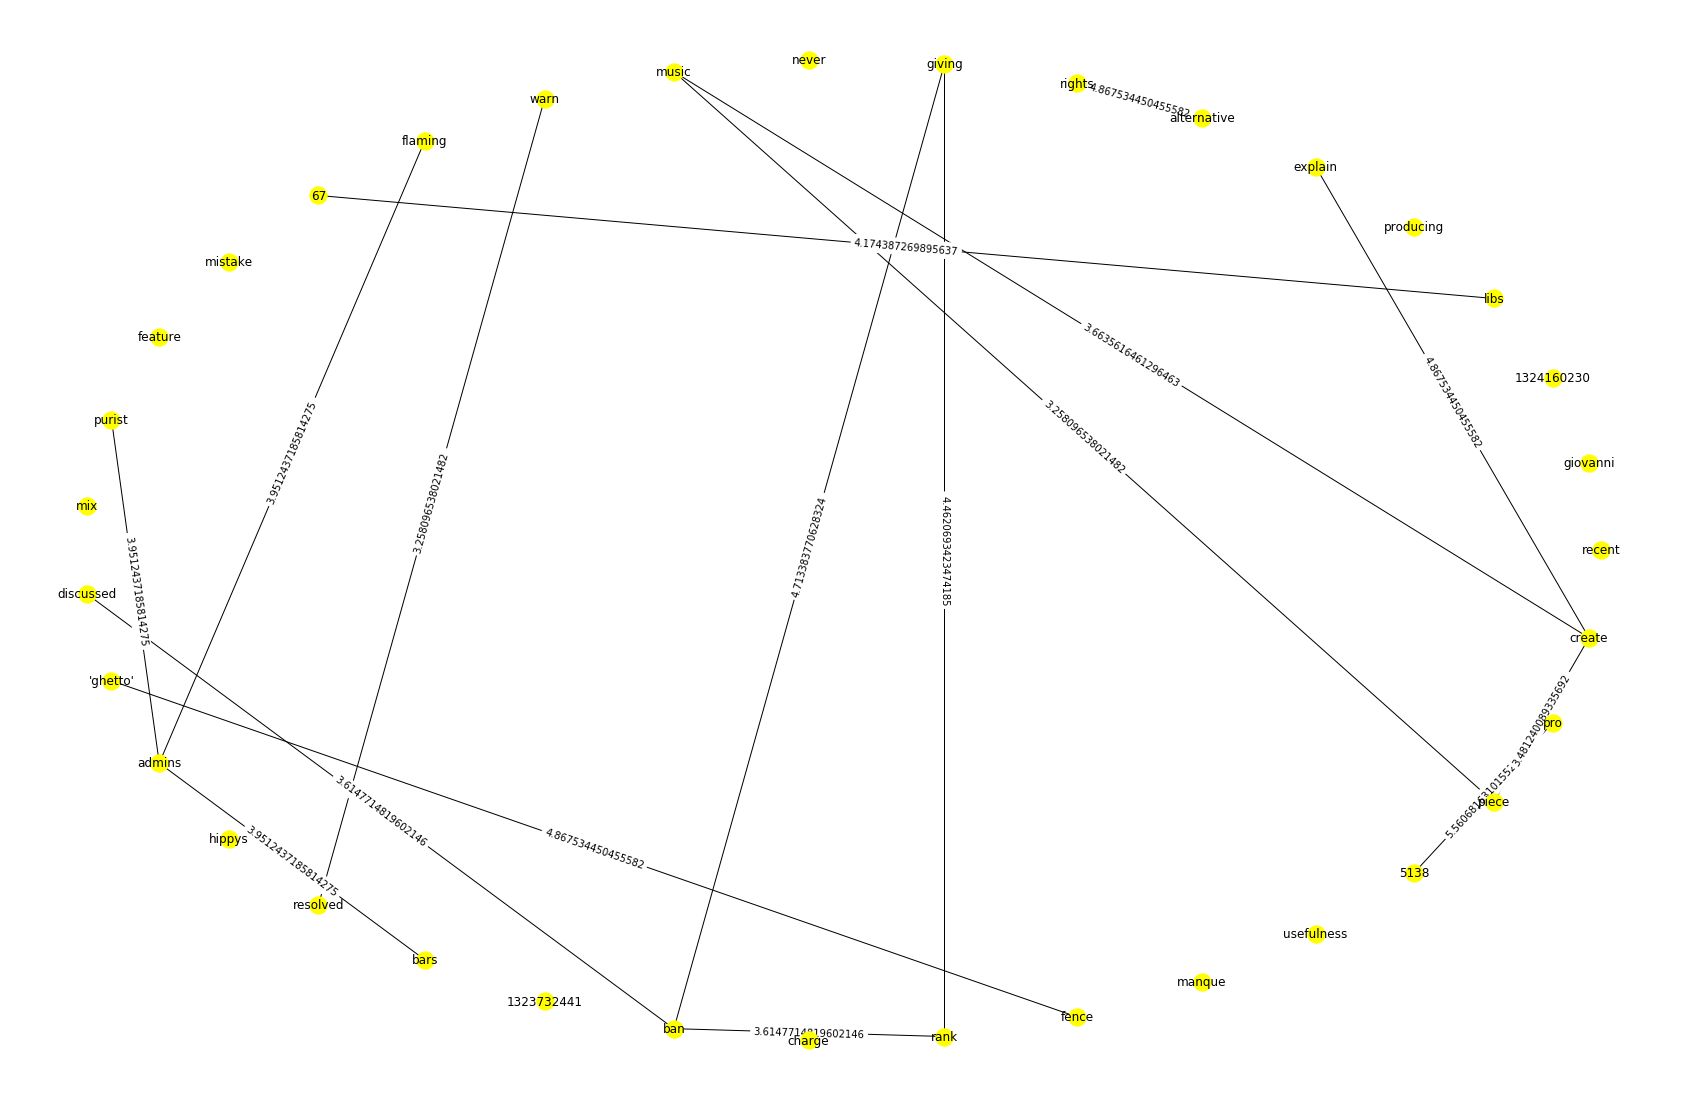

In [11]:
plt.figure(figsize=(30,20))
l = [*range(0,35)]
label_1 = {}
for i in l:
    label_1[i] = node_names[i]
b = a.subgraph(l)
pos = nx.circular_layout(b)
l1 = nx.get_edge_attributes(b,'weight')
nx.draw_networkx_edge_labels(b,pos,edge_labels=l1)
nx.draw_circular(b, with_labels= True, labels= label_1, node_color= 'yellow')


In [12]:
# !pip install torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.metrics import roc_auc_score, average_precision_score
import os
import time
import tensorflow as tf
from utils import *

In [13]:
import random
seed = random.randint(1, 200)
np.random.seed(seed)
tf.set_random_seed(seed)


In [14]:
flags = tf.app.flags
FLAGS = flags.FLAGS

tf.app.flags.DEFINE_string('f', '', 'kernel')
flags.DEFINE_string('model', 'gcn', 'Model string.')
flags.DEFINE_float('learning_rate', 0.02, 'Initial learning rate.')
flags.DEFINE_integer('epochs', 200, 'Number of epochs to train.')
flags.DEFINE_integer('hidden1', 100, 'Number of units in hidden layer 1.')
flags.DEFINE_integer('hidden2', 10, 'Number of units in hidden layer 2.')
flags.DEFINE_float('dropout', 0.5, 'Dropout rate (1 - keep probability).')
flags.DEFINE_float('weight_decay', 0,
                   'Weight for L2 loss on embedding matrix.')  # 5e-4
flags.DEFINE_integer('early_stopping', 10,
                     'Tolerance for early stopping (# of epochs).')
flags.DEFINE_integer('max_degree', 3, 'Maximum Chebyshev polynomial degree.')

In [15]:
y_total = np.identity(node_size, dtype = float) 
features = sp.identity(node_size) 

In [16]:
# print(node_size)

In [17]:
y_total = adj_1
import sys
from models import GCN, MLP
features = preprocess_features(features)

In [18]:

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

if FLAGS.model == 'gcn':
    support = [preprocess_adj(adj)]
    num_supports = 1
    model_func = GCN
elif FLAGS.model == 'gcn_cheby':
    support = chebyshev_polynomials(adj, FLAGS.max_degree)
    num_supports = 1 + FLAGS.max_degree
    model_func = GCN
elif FLAGS.model == 'dense':
    support = [preprocess_adj(adj)]  # Not used
    num_supports = 1
    model_func = MLP
else:
    raise ValueError('Invalid argument for model: ' + str(FLAGS.model))
placeholders = {
    'support': [tf.sparse_placeholder(tf.float32) for _ in range(num_supports)],
    'features': tf.sparse_placeholder(tf.float32, shape=tf.constant(features[2], dtype=tf.int64)),
    'labels': tf.placeholder(tf.float32, shape=(None, y_total.shape[1])),
    'labels_mask': tf.placeholder(tf.int32),
    'dropout': tf.placeholder_with_default(0., shape=()),
    # helper variable for sparse dropout
    'num_features_nonzero': tf.placeholder(tf.int32)
}
y_train = np.zeros(y_total.shape)
y_val = np.zeros(y_total.shape)
splitter = int(0.6 * len(y_total))

voc_split = int (0.6 * vocab_size)
doc_split = int (0.6 * max_doc_id)
auth_split = int (0.6 * author_max_id)

total_mask= np.ones(node_size)
idx_train = range(splitter)
idx_val = range(splitter, len(total_mask))
train_mask = sample_mask(idx_train, y_total.shape[0])
val_mask = sample_mask(idx_val, y_total.shape[0])

for i in range(len(train_mask)):
#     print(i)
    if (i < voc_split):
        train_mask[i] = True
    elif (vocab_size <= i and i < vocab_size + doc_split):
        train_mask[i] = True
    elif (vocab_size + max_doc_id <= i and i < vocab_size +max_doc_id + auth_split):
        train_mask[i] = True
    else:
        train_mask[i] = False
for i in range(len(train_mask)):
    if(not train_mask[i]):
        val_mask[i] = True
    else:
        val_mask[i] = False
    
    

y_train[train_mask, :] = y_total[train_mask, :]
y_val[val_mask, :] = y_total[val_mask, :]

model = model_func(placeholders, input_dim=features[2][1], logging=True)

# Initialize session
session_conf = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=session_conf)
def evaluate(features, support, labels, mask, placeholders):
    t_test = time.time()
    feed_dict_val = construct_feed_dict(
        features, support, labels, mask, placeholders)
    outs_val = sess.run([model.loss, model.accuracy, model.pred, model.labels], feed_dict=feed_dict_val)
    return outs_val[0], outs_val[1], outs_val[2], outs_val[3], (time.time() - t_test)


# Init variables
sess.run(tf.global_variables_initializer())

cost_val = []

# Train model
for epoch in range(20):

    t = time.time()
    # Construct feed dictionary
    feed_dict = construct_feed_dict(
        features, support, y_train, train_mask, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS.dropout})

    # Training step
    outs = sess.run([model.opt_op, model.loss, model.accuracy,
                     model.outputs,model.layer_output], feed_dict=feed_dict)

    # Validation
    cost, acc, pred, labels, duration = evaluate(
        features, support, y_val, val_mask, placeholders)
    cost_val.append(cost)

    print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(outs[1]),
          "train_acc=", "{:.5f}".format(
              outs[2]), "val_loss=", "{:.5f}".format(cost),
          "val_acc=", "{:.5f}".format(acc), "time=", "{:.5f}".format(time.time() - t))

    if epoch > FLAGS.early_stopping and cost_val[-1] > np.mean(cost_val[-(FLAGS.early_stopping+1):-1]):
        print("Early stopping...")
        break

print("Optimization Finished!")
model_embeddings = outs[3]
encoder_embeddings = outs[4]

W1002 15:39:27.167959 140277046732608 deprecation_wrapper.py:119] From /home/raj/Desktop/cs4-1/iron_march/models.py:144: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1002 15:39:27.168937 140277046732608 deprecation_wrapper.py:119] From /home/raj/Desktop/cs4-1/iron_march/models.py:41: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1002 15:39:27.170051 140277046732608 deprecation_wrapper.py:119] From /home/raj/Desktop/cs4-1/iron_march/inits.py:14: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 15:39:27.183900 140277046732608 deprecation_wrapper.py:119] From /home/raj/Desktop/cs4-1/iron_march/layers.py:82: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W1002 15:39:27.234067 140277046732608 deprecation_wrapper.py:119] From /home/raj/Desktop/cs4-1/iron_march/layers.py:26: The name tf.sparse_retain is d

5
Tensor("graphconvolution_4/SparseTensorDenseMatMul/SparseTensorDenseMatMul:0", shape=(?, 2904), dtype=float32)
Epoch: 0001 train_loss= 24.37818 train_acc= 0.02068 val_loss= 24.42597 val_acc= 0.02923 time= 5.36317
Epoch: 0002 train_loss= 24.35636 train_acc= 0.07122 val_loss= 24.15829 val_acc= 0.95873 time= 4.56249
Epoch: 0003 train_loss= 24.11022 train_acc= 0.96209 val_loss= 23.48211 val_acc= 0.95873 time= 4.52565
Epoch: 0004 train_loss= 23.37254 train_acc= 0.95865 val_loss= 21.93732 val_acc= 0.95873 time= 4.48953
Epoch: 0005 train_loss= 21.90760 train_acc= 0.96324 val_loss= 18.75335 val_acc= 0.95873 time= 4.57930
Epoch: 0006 train_loss= 18.75666 train_acc= 0.96611 val_loss= 12.99670 val_acc= 0.95873 time= 4.55203
Epoch: 0007 train_loss= 12.88030 train_acc= 0.95750 val_loss= 5.49273 val_acc= 0.95873 time= 4.48114
Epoch: 0008 train_loss= 6.13959 train_acc= 0.96324 val_loss= 1.71627 val_acc= 0.95873 time= 4.46568
Epoch: 0009 train_loss= 1.90245 train_acc= 0.96497 val_loss= 0.85119 val_a

In [19]:
len(train_mask)

2904

In [20]:
len(encoder_embeddings[0])

10

In [21]:
from sklearn.cluster import KMeans

def count_elements(seq) :
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

kmeans = KMeans(n_clusters=4, random_state=0).fit(model_embeddings)

clusters =kmeans.labels_

kmeans_encoder = KMeans(n_clusters=4, random_state=0).fit(encoder_embeddings)
X = encoder_embeddings
y_kmeans =kmeans_encoder.labels_

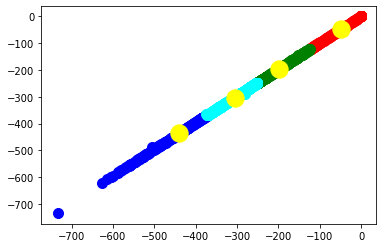

In [22]:
plt.scatter(model_embeddings[clusters==0, 0], model_embeddings[clusters==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(model_embeddings[clusters==1, 0], model_embeddings[clusters==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(model_embeddings[clusters==2, 0], model_embeddings[clusters==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(model_embeddings[clusters==3, 0], model_embeddings[clusters==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.show()

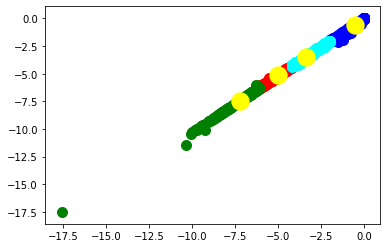

count for cluster: 0 is 1383
count for cluster: 1 is 254
count for cluster: 2 is 399
count for cluster: 3 is 868


In [23]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans_encoder.cluster_centers_[:, 0], kmeans_encoder.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.show()
counts = count_elements(y_kmeans)
for i in range(4):
    print("count for cluster:",i, "is" ,counts[i])

In [24]:
kmeans_docs = KMeans(n_clusters=4, random_state=0).fit(encoder_embeddings[vocab_size: vocab_size + max_doc_id])
docs = encoder_embeddings[vocab_size: vocab_size + max_doc_id]
y_docs =kmeans_docs.labels_

# plt.scatter(docs[y_docs==0, 0], docs[y_docs==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(docs[y_docs==1, 0], docs[y_docs==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(docs[y_docs==2, 0], docs[y_docs==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(docs[y_docs==3, 0], docs[y_docs==3, 1], s=100, c='cyan', label ='Cluster 4')

# plt.scatter(kmeans_encoder.cluster_centers_[:, 0], kmeans_encoder.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

# plt.show()
counts = count_elements(y_docs)
for i in range(4):
    print("count for cluster:",i, "is" ,counts[i])
# for i,topic in topics_2011.iterrows():
#     temp = topic["mt_id"] + vocab_size
#     name = topic["mt_title"]
#     cluster = y_docs[i]
#     print(name, cluster)

    

count for cluster: 0 is 99
count for cluster: 1 is 1
count for cluster: 2 is 1
count for cluster: 3 is 8


In [25]:
kmeans_auth = KMeans(n_clusters=4, random_state=0).fit(encoder_embeddings[vocab_size + max_doc_id : vocab_size + max_doc_id+author_max_id])
auth = encoder_embeddings[vocab_size + max_doc_id : vocab_size + max_doc_id+author_max_id]
y_auth =kmeans_auth.labels_

# plt.scatter(auth[y_auth==0, 0], auth[y_auth==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(auth[y_auth==1, 0], auth[y_auth==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(auth[y_auth==2, 0], auth[y_auth==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(auth[y_auth==3, 0], auth[y_auth==3, 1], s=100, c='cyan', label ='Cluster 4')

# plt.scatter(kmeans_encoder.cluster_centers_[:, 0], kmeans_encoder.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

# plt.show()
counts = count_elements(y_auth)
for i in range(4):
    print("count for cluster:",i, "is" ,counts[i])

count for cluster: 0 is 79
count for cluster: 1 is 9
count for cluster: 2 is 1
count for cluster: 3 is 2


In [26]:
from minisom import MiniSom
som = MiniSom(25, 25, 10, sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train_batch(encoder_embeddings, 2000, verbose=True)

 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.148163789193895


/home/raj/anaconda3/lib/python3.7/site-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


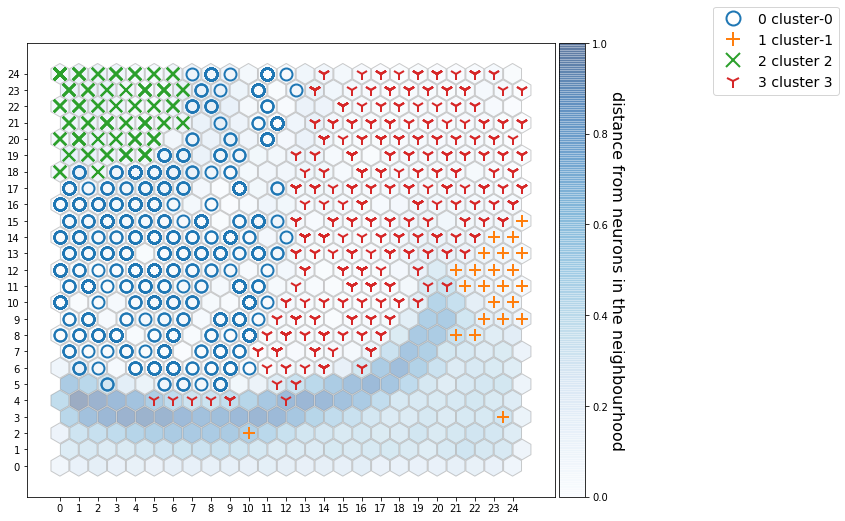

count for cluster: 0 is 1383
count for cluster: 1 is 254
count for cluster: 2 is 399
count for cluster: 3 is 868


In [27]:


f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        
        wy = yy[(i, j)]*2/np.sqrt(3)*3/4
        
        hex = RegularPolygon((xx[(i, j)], wy), numVertices=6, radius=.95/np.sqrt(3),
                      facecolor=cm.Blues(umatrix[i, j]), alpha=.4, edgecolor='gray')
        ax.add_patch(hex)
markers = ['o', '+', 'x','1',]
colors = ['C0', 'C1', 'C2','C3']
# markers = ['o', '+', 'x','1','2','3','4','v','8','s']
# colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']
for cnt, x in enumerate(encoder_embeddings):
    w = som.winner(x)  # getting the winner
#     print(x)
    # palce a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy*2/np.sqrt(3)*3/4
#     print(wy,wx)
    plt.plot(wx, wy, marker= markers[y_kmeans[cnt]], markerfacecolor='None', markeredgecolor=colors[y_kmeans[cnt]], markersize=12, markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange*2/np.sqrt(3)*3/4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='0 cluster-0',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='1 cluster-1',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='2 cluster 2',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='1', color='C3', label='3 cluster 3',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
#                    Line2D([0], [0], marker='3', color='C5', label='5 cluster-10514',
#                    markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
#                    Line2D([0], [0], marker='4', color='C6', label='6 cluster-50',
#                    markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
#                    Line2D([0], [0], marker='v', color='C7', label='7 cluster-283',
#                    markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
#                    Line2D([0], [0], marker='8', color='C8', label='8 cluster-4',
#                    markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
#                    Line2D([0], [0], marker='s', color='C9', label='9 cluster-13',
#                    markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1.08), loc='upper left', 
          borderaxespad=0., ncol=1, fontsize=14)

plt.show()

counts = count_elements(y_kmeans)
for i in range(4):
    print("count for cluster:",i, "is" ,counts[i])

/home/raj/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


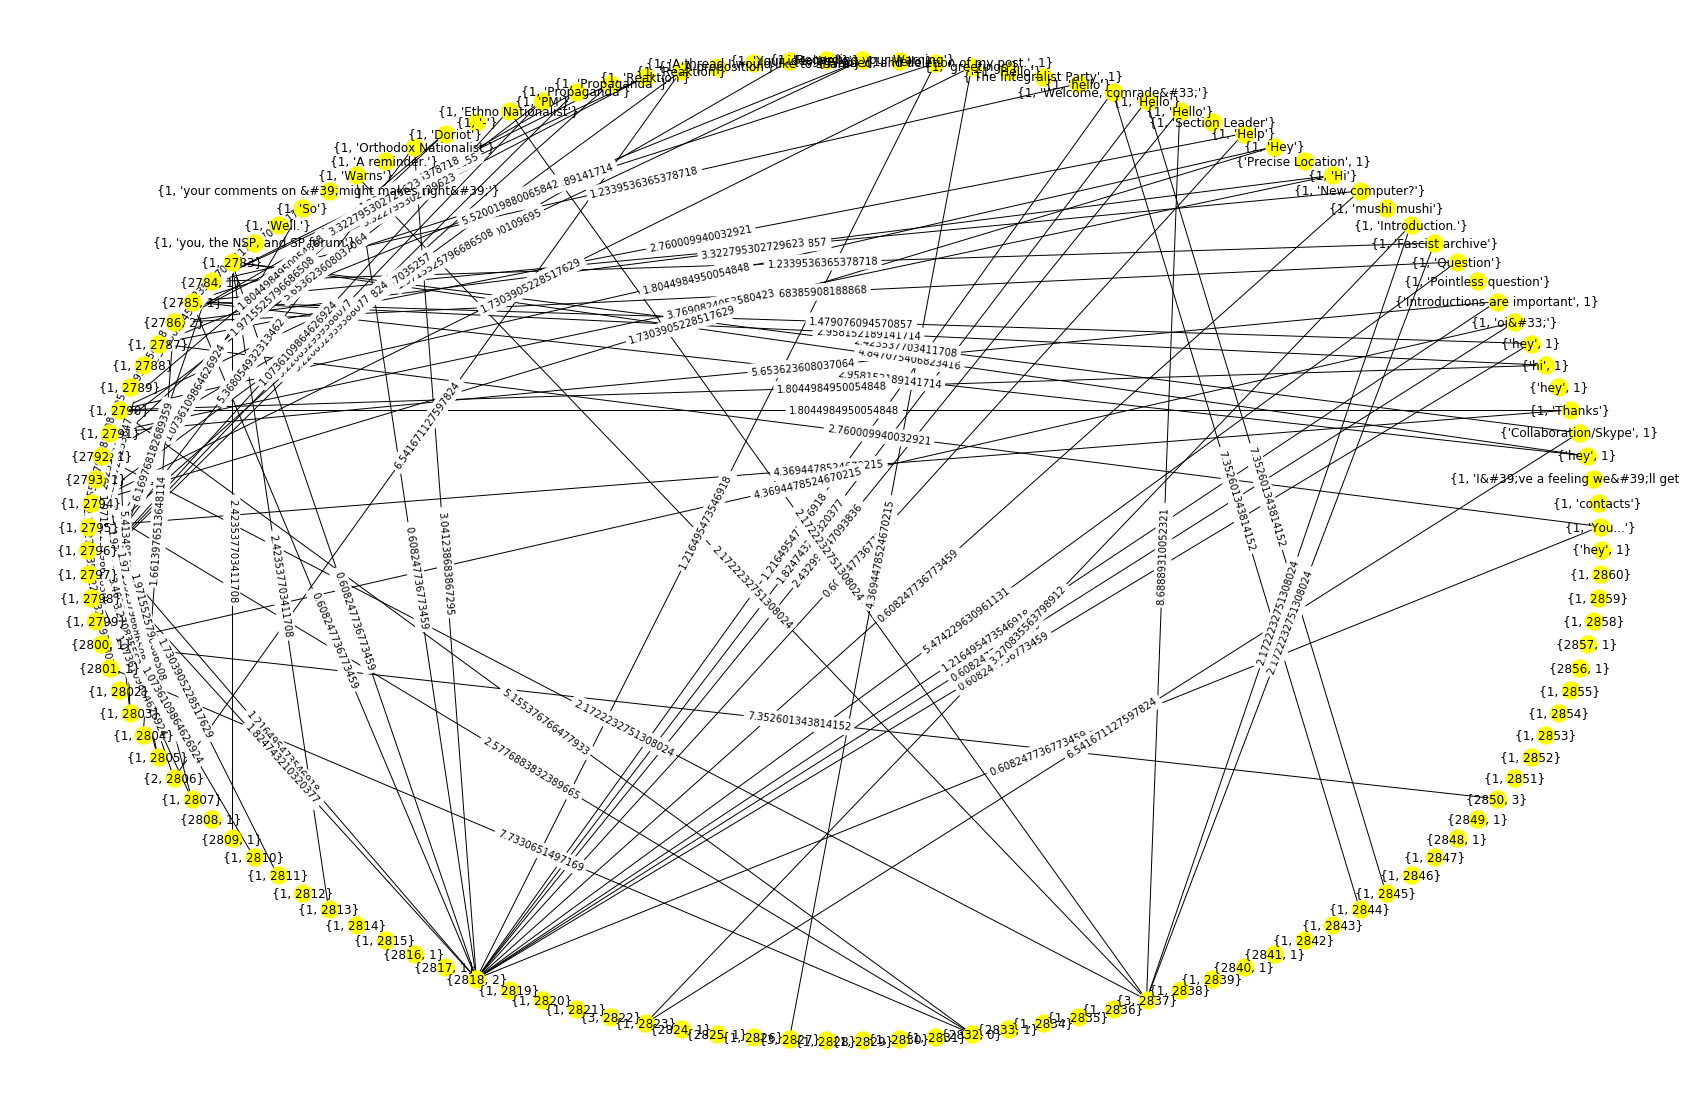

In [28]:
plt.figure(figsize=(30,20))
l = [*range(2731,2861)]
label_1 = {}
for i in l:
    label_1[i] = {node_names[i],y_kmeans[i]}

b = a.subgraph(l)
pos = nx.circular_layout(b)
l1 = nx.get_edge_attributes(b,'weight')
nx.draw_networkx_edge_labels(b,pos,edge_labels=l1)
nx.draw_circular(b, with_labels= True, labels= label_1, node_color= 'yellow')

In [29]:
# node_size